### 1. Linear Discriminant Analysis

In [3]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [13]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

LinearDiscriminantAnalysis()

In [14]:
print(clf.predict([[-0.8, -1]]))

[1]


### 2. Quadratic Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [16]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis()

In [17]:
print(clf2.predict([[-0.8, -1]]))

[1]


### 3. LDA, QDA 비교

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[3, 0],
       [0, 3]], dtype=int64)

In [20]:
y_pred2 = clf2.predict(X)
confusion_matrix(y, y_pred2)

array([[3, 0],
       [0, 3]], dtype=int64)

### 4. LDA, QDA 시각적 비교

In [21]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

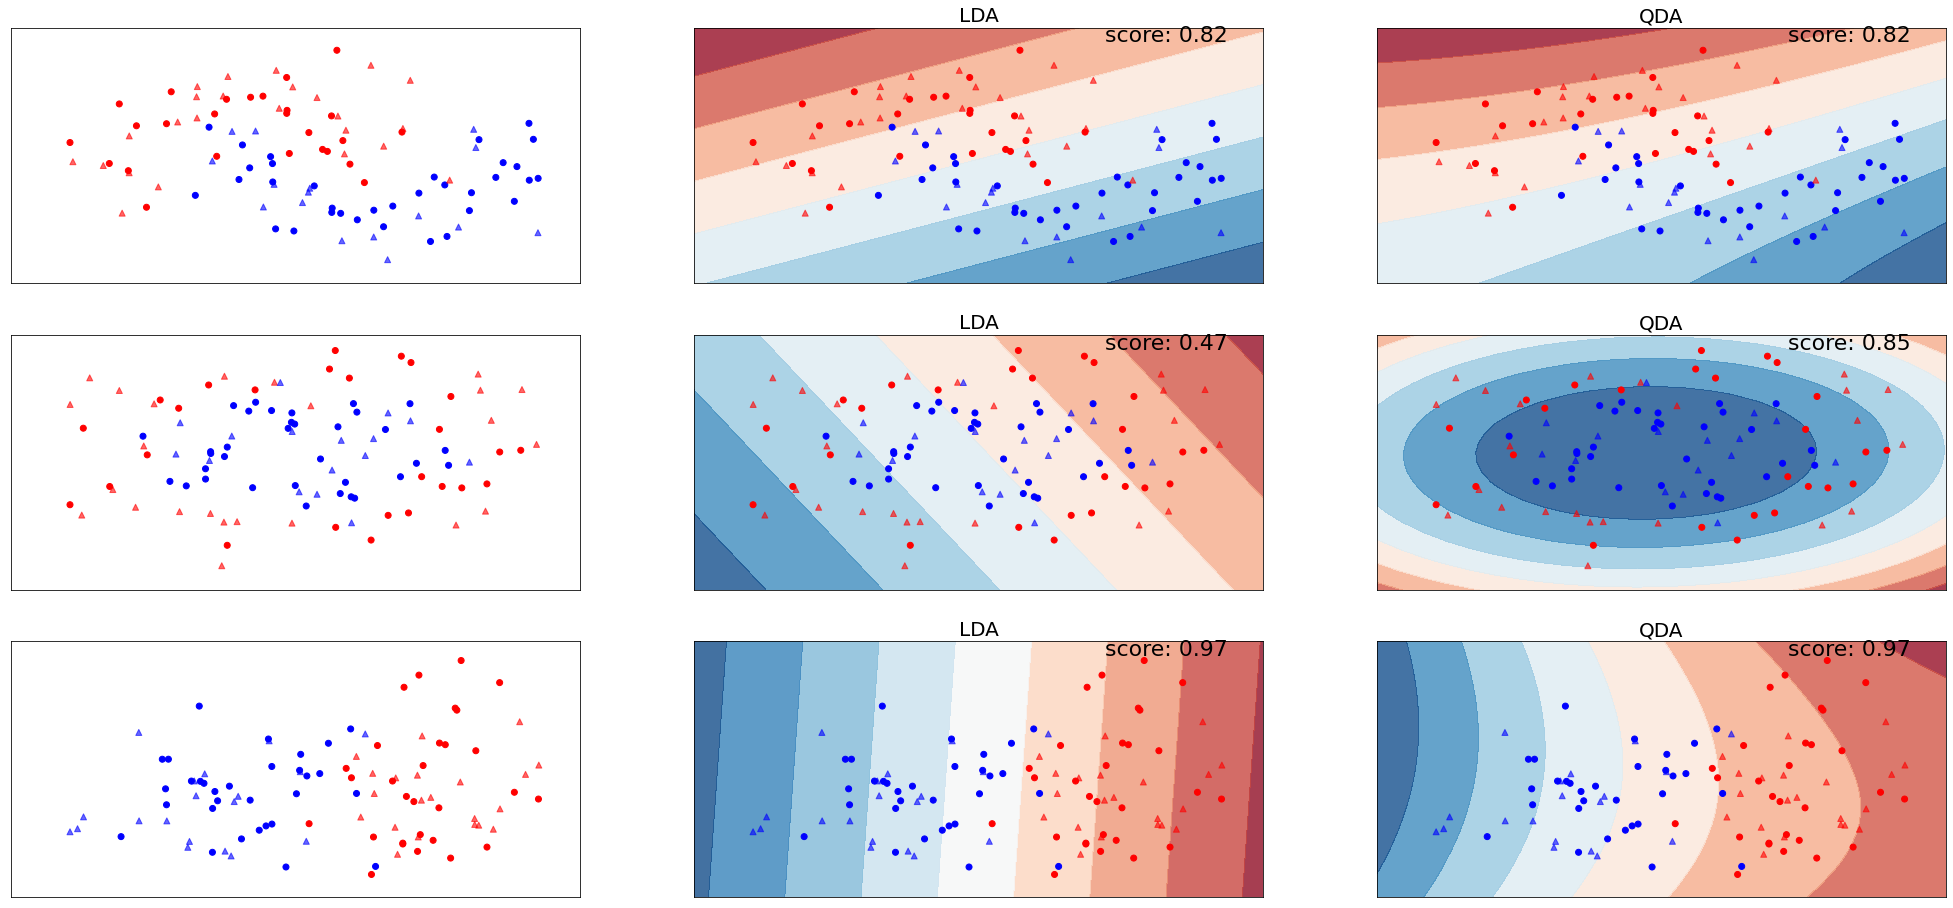

In [41]:
h = 0.2
names = ['LDA', 'QDA']
classifier = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(28, 16))
i = 1

for ds in datasets:
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # plot the dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifier) + 1, i)
    
    # plot the training points
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
    
    # plot the testing points
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, marker='^', alpha=0.6)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    for name, clf in zip(names, classifier):
        ax = plt.subplot(len(datasets), len(classifier)+1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # plot the decision boundary
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
        
        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        
        # plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='^', alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name, size=20)
        ax.text(xx.max() - .3, yy.max() - .3, ('score: %.2f' % score).lstrip('0'), size=22, horizontalalignment='right')
        i += 1
    
figure.subplots_adjust(left=.02, right=.98)
plt.show()